# Practice Session 01+02: Data preparation

<font size="+2" color="blue">Additional results: model purchased device</font>

Data scientists [spend a big chunk of their time preparing data](https://blog.ldodds.com/2020/01/31/do-data-scientists-spend-80-of-their-time-cleaning-data-turns-out-no/) and this is one of the first steps in any data mining project. This step is normally called **data preparation**.

The processes of getting an initial understanding of a dataset and preparing it usually go hand-in-hand, and it is critical to perform them well to obtain valid results later. Plus, you can save time and effort by learning how to do proper data preparation.

In this session, we will assume you just received a new dataset and need to do some initial steps with it:

1) Exploratory Data Analysis

* Calculate basis statistics as mean, median, variance, maximum and minimum
* Look at distributions, identify outliers
* Calculate correlations between variables

2) Feature engineering:

* Deal with missing values
* Standardize all numerical columns
* Convert categorical columns to dummy binary variables
* Date and period management
* Feature generation

*Tip*: This process has several steps. It is tempting to maintain a single variable throughout the entire cleaning process, and do something like `x = x.step1()` then `x = x.step2()`. This will create problems for you because if you go back and re-execute a cell it might fail to operate on already transformed data. A better approach in cases like this where you do not have memory problems, is to do `x1 = x.step1()`, `x2 = x1.step2()` and so on, i.e., create a new variable after each transformation or set of transformations.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 0. The dataset

The dataset, contained in `device_db.csv` is a 10000 registers of mobile device purchases around 2019. **Each record in the dataset describes a customer that buys a new mobile telephone**. The attributes are defined as follows:

0. PURCHASED_DEVICE: the mobile phone bought by the customer
1. DEVICE_VALUE: the cost of the mobile phone bought by the customer
2. LAST_DEVICE_DATE: the date of the previous mobile device purchase
3. DATA\_TRAFFIC\_MONTH_(1..6): The Mbps of data traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
4. VOICE\_TRAFFIC\_MONTH_(1..6): The minutes of voice traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
5. BILLING\_MONTH\_(1..6): Billing (USD) in the month (-1...-6) paid by the customer previous to the mobile device purchase
6. DEVICE\_COST\_MONTH_(1..6): Monthly cost (USD) associated to the mobile device finance in the month (-1...-6) paid by the customer previous to the mobile device purchase: proportion of owner-occupied units built prior to 1940
7. LINE\_ACTIVATION\_DATE: Date of the activation of the mobile line by the customer
8. MONTHS\_LAST\_DEVICE: Number of months of the previous mobile device
9. DURATION\_LINE: Number of months since the customer contracted the mobile line
10. PREVIOUS\_DEVICE\_MODEL: Model of the previous mobile phone
11. PREVIOUS\_DEVICE\_MANUF: Manufacturer of the previous mobile phone
12. PREVIOUS\_DEVICE\_BRAND: Brand of the previous mobile phone

This dataset will be used in next practices as recommendation engines.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Exploratory data analysis

Exploratory Data Analysis (EDA) allows to us to have an understanding of the dataset from a stadistics perspective, i.e., data distribution and correlation between variables. This is crucial to select the most relevant variables for some purpose.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

We open the csv file contaning the data using separator ";" and assign to a dataframe (use `read_csv` from the Pandas library).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=";")

## 1.1. Data types and simple statistics

<font size="+1" color="red">Replace this cell with your code to print the dataset header (column names) and the first five rows of data.</font>

In [ ]:
print("Dataset columns:")
print(input_dataset.columns)

print("\nTop 5 rows from the dataset:")
print(input_dataset.head(5))

Dataset columns:
Index(['PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,VOICE_TRAFFIC_MONTH_5,VOICE_TRAFFIC_MONTH_6,BILLING_MONTH_1,BILLING_MONTH_2,BILLING_MONTH_3,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND'], dtype='object')

Top 5 rows from the dataset:
  PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,VOICE_TRAFFIC_MONT

There are many ways of creating a data frame. Above, we created it by reading a file, but one can also create a dataframe from scratch, using an array of dictionaries. Example:

```python
countries = []
countries.append({'capital': 'Београд', 'country': 'Република Србија'})
countries.append({'capital': 'Nairobi', 'country': 'Jamhuri ya Kenya'})
countries_df = pd.DataFrame(countries, columns=['country', 'capital'])
display(countries_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Create a dataframe named `column_type_df` containing the name of each column, its type and the number of distinct elements in that column. To iterate through the columns of dataframe `df`, use `for column in df.columns`; to determine the type of a column, use `df[column].dtype`; to retrieve the number of distinct elements of that column, use `df[column].nunique()`; to retrieve the size of a column, use `df[column].size`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size. The size of all columns should be equal.</font>

In [ ]:
#We create the structure
data = {
    "Column_Name": [],
    "Data_Type": [],
    "Distinct_Elements": [],
    "Size": []
}
#We store the results in every column
for column in input_dataset.columns:
    data["Column_Name"].append(column)
    data["Data_Type"].append(input_dataset[column].dtype)
    data["Distinct_Elements"].append(input_dataset[column].nunique())
    data["Size"].append(input_dataset[column].size)

#We create the Dataframe
column_type_df = pd.DataFrame(data)
column_type_df

,Column_Name,Data_Type,Distinct_Elements,Size
0,"PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHAN...",object,7914,8021


To obtain a **series** (column) from a dataframe you can reference an attribute by name, e.g., `input_dataset.DEVICE_VALUE` returns the series of all device values.

On a series, you can use functions from [numpy](https://numpy.org/doc/) such as `np.mean`, `np.median`, `np.std`, `np.min` and `np.max`; meanings are self-explanatory. These functions have equivalents `np.nanmean`, `np.nanmedian`, and so on that ignore NaN (not-a-number) values.

To display floats using two decimals, you can use:

```python
pd.options.display.float_format = '{:.2f}'.format
```


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create and display a dataframe containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -- all computed ignoring NaN values.</font>

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Load dataset
input_dataset = pd.read_csv("device_db.csv", sep=",")

# Filter columns of type float64
float_cols = input_dataset.select_dtypes(include=['float64']).columns

# Initialize a dictionary to store statistics
float_stats = {
    "Column_Name": [],
    "Mean": [],
    "Median": [],
    "Min": [],
    "Max": []
}

# Calculate the statistics for each column
for column in float_cols:
    float_stats["Column_Name"].append(column)
    float_stats["Mean"].append(np.nanmean(input_dataset[column]))
    float_stats["Median"].append(np.nanmedian(input_dataset[column]))
    float_stats["Min"].append(np.nanmin(input_dataset[column]))
    float_stats["Max"].append(np.nanmax(input_dataset[column]))

# Create a dataframe to display the results
float_stats_df = pd.DataFrame(float_stats)

# Display the statistics
float_stats_df


,Column_Name,Mean,Median,Min,Max
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


The `describe` function can be used to describe a series. To invoke it simply do `input_dataset.DEVICE_VALUE.describe()`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [ ]:
# Loop through all columns and print the description
for column in input_dataset.columns:
    print(f"Statistics for column: {column}")
    print(input_dataset[column].describe())
    print("\n")  # Blank line after each description

Statistics for column: PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


Statistics for column: DEVICE_VALUE
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64


Statistics for column: LAST_DEVICE_CHANGE
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64


Statistics for column: DATA_TRAFFIC_MONTH_1
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


S

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DURATION_LINE** (time that the customer has had a line) with the ones from the `describe` function.</font>

<font size="+1" color="red">Indicate all the differences between the statistics that `describe` computed, and the statistics you computed (e.g., missing or extra computations).</font>

We can see the next features:

- **Mean:** In both cases the mean is 62.37. There are not differences.
- **Median:** Computed median by describe() is 48.00, the same result of my computed median. Median is the same concept that 50% from describe()
- **Min:** In both cases the minimum is 0.00. There is not differences here.
- **Max:** In both cases the maximum is 320.00. There is not differences here.
- **Standard Deviation:** In the describe() case, Std calculated is 52.07. In my stadistics, I didn't compute this operation. So std is  missing computation from my part.
- **25%:** In the describe() case, 25% calculated is 21.00. In my stadistics, I didn't compute this operation. So 25% is a missing computation from my part.
- **75%:** In the describe() case, 75% calculated is 84.00. In my stadistics, I didn't compute this operation. So 75% is a missing computation from my part.



## 1.2. Inventory of device models

In exploratory data analysis, it is very useful to do an **inventory** or **census** of the possible values of a variable. For us, a census will be a frequency table in which you show the possible values of a variable, and their frequency, in decreasing order of frequency.



<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [ ]:
# Census of PREVIOUS_DEVICE_MODEL
model_census = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
model_census.columns = ['PREVIOUS_DEVICE_MODEL', 'FREQUENCY']

# Display census of PREVIOUS_DEVICE_MODEL
print("Census of PREVIOUS_DEVICE_MODEL:")
print(model_census)

# Census of PREVIOUS_DEVICE_BRAND
brand_census = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
brand_census.columns = ['PREVIOUS_DEVICE_BRAND', 'FREQUENCY']

# Display census of PREVIOUS_DEVICE_BRAND
print("\nCensus of PREVIOUS_DEVICE_BRAND:")
print(brand_census)


Census of PREVIOUS_DEVICE_MODEL:
       PREVIOUS_DEVICE_MODEL  FREQUENCY
0                   iPhone 7        425
1                   iPhone 6        250
2          Samsung Galaxy J5        243
3                  iPhone 6S        212
4     Samsung Galaxy J1 Mini        204
..                       ...        ...
575         LG Optimus L3 II          1
576  Lenovo S930,Lenovo S939          1
577         Samsung Corby II          1
578                 SGH-U600          1
579               Nokia 1100          1

[580 rows x 2 columns]

Census of PREVIOUS_DEVICE_BRAND:
  PREVIOUS_DEVICE_BRAND  FREQUENCY
0               Samsung       1877
1                Outros       1592
2                 Apple       1548
3              Motorola        638
4                    LG        514


<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

It could be because of iPhone 7 was the model most sold and the other advices of the brand wasn't a lot of purchased by customers. Meanwhile, every model of Samsung was not so sold compared to iPhone 7 but the sum of total purchases was bigger than the brand iPhone.

# 2. Feature engineering

Feature engineering is the process of extracting valuable features from the data. This requires pre-processing, combining, normalizing, and performing other operations on the values of some features.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Missing values management

**Not A Number** (NaN) is a generic term to refer to *something that should be a number, but is not*. Usually, the value is either missing completely ("null") or contains the wrong type of object, such as a string or a concept such as infinity.

To find which columns contain NaN values, you can use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function, as explained, e.g., [here](https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab).

To display a column as percentages in a dataframe, you can use:

```python
df['column_name'] = df['column_name'].map('{:,.2%}'.format)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column. (Create a dataframe with this information, and then display it.)</font>

In [ ]:
# Calculate the percentage of NaN values in each column
nan_percentage = input_dataset.isna().mean() * 100

# Filter columns that contain at least one NaN value
nan_columns = nan_percentage[nan_percentage > 0].reset_index()
nan_columns.columns = ['Column Name', 'Percentage of NaN Values']

# Format the percentage column to show as percentages
nan_columns['Percentage of NaN Values'] = nan_columns['Percentage of NaN Values'].map('{:,.2f}%'.format)
nan_columns

,Column Name,Percentage of NaN Values
0,PURCHASED_DEVICE,1.47%
1,DEVICE_VALUE,3.10%
2,LAST_DEVICE_CHANGE,23.18%
3,DATA_TRAFFIC_MONTH_1,11.32%
4,DATA_TRAFFIC_MONTH_2,11.59%
5,DATA_TRAFFIC_MONTH_3,11.54%
6,DATA_TRAFFIC_MONTH_4,11.83%
7,DATA_TRAFFIC_MONTH_5,11.34%
8,DATA_TRAFFIC_MONTH_6,14.65%
9,VOICE_TRAFFIC_MONTH_1,11.32%


The way **NaNs** are managed varies according to the meaning of each variable. In some occasions, registers should be removed, filled with other columns or calculated (imputed).

* To delete all rows containing a null value, we can use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* To replace null values, we can use [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Please note that these steps should be applied sequentially, i.e., the output of one step should be fed into the next step. You can do, for instance: `df02 = df01.operation(...)` followed by `df03 = df02.operation(...)` and so on.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [ ]:
# Remove rows with NaN in the specified columns
cleaned_dataset_1 = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])
#Print the shape of previous dataset and the cleaned dataset
print("Original dataset shape:", input_dataset.shape)
print("Cleaned_dataset_1 shape:", cleaned_dataset_1.shape)

Original dataset shape: (10000, 33)
Cleaned_dataset_1 shape: (5988, 33)


<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [ ]:
# Define the columns that need NaN imputation
columns_to_impute = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
    'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
    'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6'
]

# Fill NaN values with 0 in the specified columns
cleaned_dataset_2=cleaned_dataset_1.copy()
cleaned_dataset_2[columns_to_impute] = cleaned_dataset_2[columns_to_impute].fillna(0.00)
cleaned_dataset_2[columns_to_impute].head()

,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,BILLING_MONTH_3,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6
0,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,21.80,21.80,30.00,...,86.05,88.65,85.00,103.35,12.00,12.00,12.00,12.00,12.00,12.00
1,232.24,272.26,272.26,704.89,412.72,365.14,3.70,0.50,0.50,4.70,...,47.00,47.73,50.80,56.56,0.00,0.00,0.00,0.00,0.00,0.00
2,484.62,264.14,264.14,348.50,380.44,250.74,26.10,218.70,218.70,56.80,...,129.14,122.64,115.02,128.04,0.00,0.00,0.00,0.00,0.00,0.00
3,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,216.30,216.30,153.30,...,58.00,60.93,55.99,55.99,6.00,6.00,6.00,6.00,6.00,6.00
4,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,0.00,0.00,0.00,...,110.69,110.15,107.99,107.99,0.00,0.00,0.00,0.00,0.00,0.00


<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [ ]:
# Impute LINE_ACTIVATION_DATE with LAST_DEVICE_CHANGE where it is NaN
cleaned_dataset_3=cleaned_dataset_2.copy()
cleaned_dataset_3['LINE_ACTIVATION_DATE'].fillna(cleaned_dataset_3['LAST_DEVICE_CHANGE'])

,LINE_ACTIVATION_DATE
0,20041220.00
1,20170405.00
2,20040412.00
3,20110825.00
4,20140617.00
...,...
9994,20150622.00
9995,20170419.00
9996,20130326.00
9997,20110214.00


<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [ ]:
print(cleaned_dataset_3.head())

                                    PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        393.00   
1  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
2     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        875.00   
3  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
4     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        609.00   

   LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  DATA_TRAFFIC_MONTH_2  \
0                 NaN                465.25                530.81   
1         20170401.00                232.24                272.26   
2                 NaN                484.62                264.14   
3         20171001.00               4255.46                836.12   
4         20190101.00               5014.10               2659.05   

   DATA_TRAFFIC_MONTH_3  DATA_TRAFFIC_MONTH_4  DATA_TRAFFIC_MONTH_5  \
0                530.81                781.13                398.99   
1                272.2

If `df` is a dataframe, `df.shape` contains a tuple with the number of rows and the number of columns of the data frame. You should now print something like this:

```
Rows in the original dataset: M
Rows in the new dataset: N ((100*(M-N)/M)% less)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [ ]:
# Store the original number of rows
original_row_size = input_dataset.shape[0]

#Store the cleaned dataset number of rows
new_row_size = cleaned_dataset_3.shape[0]

# Calculate the percentage of rows dropped
percentage_dropped = 100 * (original_row_size - new_row_size) / original_row_size

# Identify columns that still contain NaN values
columns_with_nan = cleaned_dataset_3.columns[cleaned_dataset_3.isna().any()].tolist()

# Print the results
print(f"Rows in the original dataset: {original_row_size}")
print(f"Rows in the new dataset: {new_row_size} ({percentage_dropped:.2f}% less)")
print(f"Columns that still contain NaN values: {', '.join(columns_with_nan)}")


Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)
Columns that still contain NaN values: LAST_DEVICE_CHANGE, LINE_ACTIVATION_DATE, MONTHS_LAST_DEVICE, DURATION_LINE


## 2.2. Distributions, outliers, and correlations

We will now plot the distributions of some variables and apply some transformations.

* You can use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram.
* You can use [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with `kind='box'` to create a boxplot.

Remember to include a title, x-axis label, and y-axis label. All of your plots delivered throughout the course should include these elements. Example:

```
ax = sns.histplot(...)
ax.set(title=..., xlabel=..., ylabel=...)
```
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to plot a histogram of **DEVICE\_VALUE** and **DURATION\_LINE**. Remember to include a title, and labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

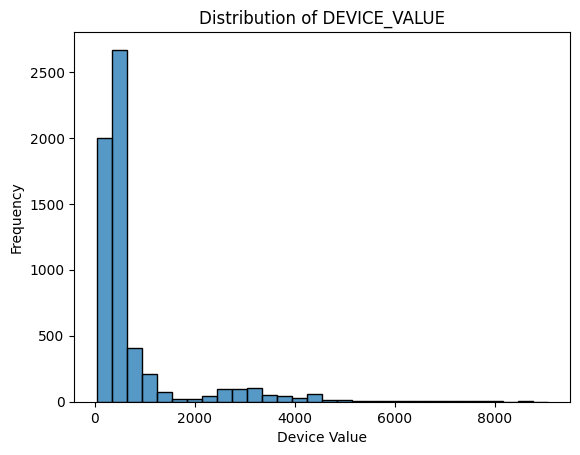

In [ ]:
# Plot histogram for DEVICE_VALUE
ax1 = sns.histplot(data=cleaned_dataset_3, x='DEVICE_VALUE',bins=30, kde=False)
ax1.set(title='Distribution of DEVICE_VALUE', xlabel='Device Value', ylabel='Frequency')
plt.show()

- **Distribution of DEVICE_VALUE:** This doesn't appear to be a normal distribution. The distribution is right-skewed, so we can see that most of data points are in low values with a long tail to high values. The distribution follows a structure similar to exponential distribution. The frequency decreases abruptly with high values. It is an unimodal distribution because it has just a peak.

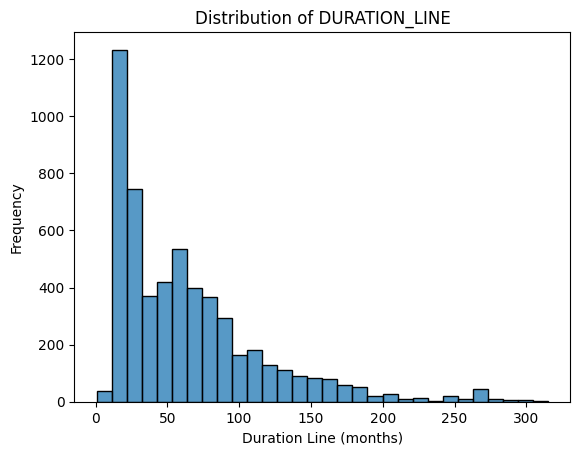

In [ ]:
# Plot histogram for DURATION_LINE
ax2 = sns.histplot(data=cleaned_dataset_3, x='DURATION_LINE', bins=30, kde=False)
ax2.set(title='Distribution of DURATION_LINE', xlabel='Duration Line (months)', ylabel='Frequency')
plt.show()

- **Distribution of DURATION_LINE:** This doesn't appear to be a normal distribution. The distribution is right-skewed, so we can see that most of data points are in low values with a long tail to high values. The distribution follows a structure similar to exponential distribution. The frequency decreases with high values but in this case the long tail doesn't decrease so abrupt. It is an unimodal distribution because it has just a peak.

To be able to see better these histograms when comparing them, you can use:

```
sns.histplot(data=..., bins=20, fill=False)
```

To use logarithmic scale on the X axis or the Y axis, you can use `plt.xscale('log')` or `plt.yscale('log')`.
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram comparing **VOICE\_TRAFFIC\_MONTH\_1** against **VOICE\_TRAFFIC\_MONTH\_6**, and **BILLING\_MONTH\_1** against **BILLING\_MONTH\_6**. Remember to include a title, labels on the x axis and y axis, and a legend.</font>

<font size="+1" color="red">Both plots should use logarithmic scale on the y axis</font>

<font size="+1" color="red">Include after both histograms your comment on the differences between month 1 and month 6.</font>

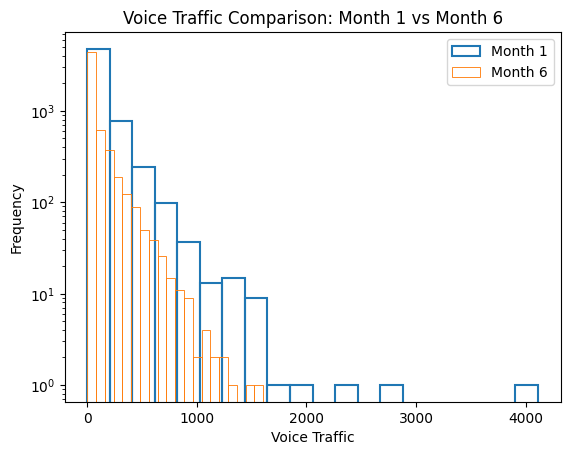

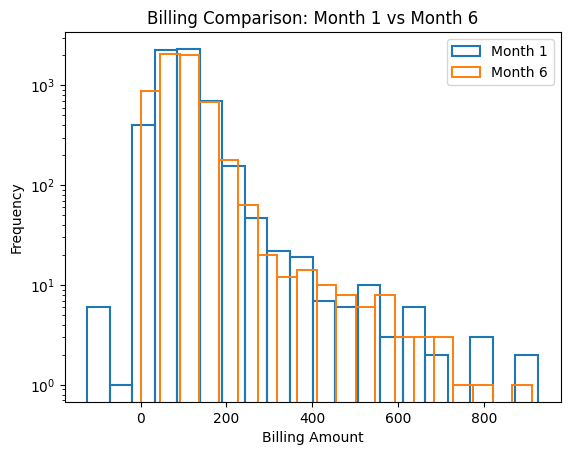

In [ ]:
# Plot histogram for VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6
sns.histplot(data=cleaned_dataset_3, x='VOICE_TRAFFIC_MONTH_1', bins=20, fill=False, label='Month 1')
sns.histplot(data=cleaned_dataset_3, x='VOICE_TRAFFIC_MONTH_6', bins=20, fill=False, label='Month 6')
plt.title('Voice Traffic Comparison: Month 1 vs Month 6')
plt.xlabel('Voice Traffic')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

# Plot histogram for BILLING_MONTH_1 and BILLING_MONTH_6
sns.histplot(data=cleaned_dataset_3, x='BILLING_MONTH_1', bins=20, fill=False, label='Month 1')
sns.histplot(data=cleaned_dataset_3, x='BILLING_MONTH_6', bins=20, fill=False, label='Month 6')
plt.title('Billing Comparison: Month 1 vs Month 6')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

**Voice Traffic Comparison: Month 1 vs Month 6**

- Month 1 generally has higher frequencies for most voice traffic values compared to Month 6, suggesting that there was more voice traffic in the first month.
- Month 6 has fewer instances of high voice traffic values, indicating a possible decrease in voice traffic usage over time.

**Billing Comparison: Month 1 vs Month 6**

- In the lower billing amounts (under 200), the frequencies for Month 6 are slightly higher, which may suggest a reduction in higher billing amounts over time.
- For larger billing amounts, Month 1 has higher frequencies than Month 6, indicating that bills tended to be higher in Month 1.

Variables having exponential distribution can be processed and visualized better after transforming them, usually by applying the `log(x+1)` function (we want to avoid zeros, hence the +1).
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

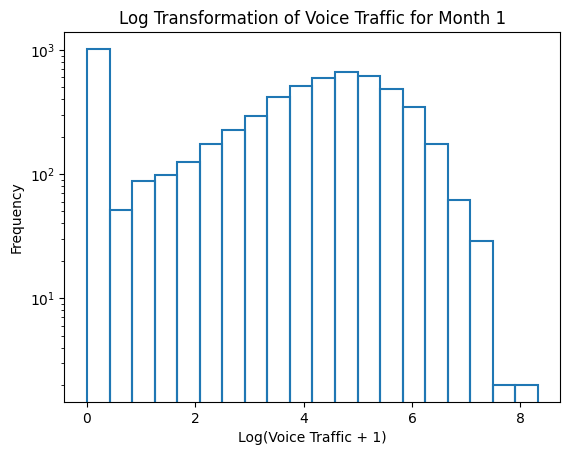

In [ ]:
# Apply log(x + 1) transformation to VOICE_TRAFFIC_MONTH_1
cleaned_dataset_3['VOICE_TRAFFIC_MONTH_1_LOG'] = np.log(cleaned_dataset_3['VOICE_TRAFFIC_MONTH_1'] + 1)

# Plot the transformed distribution
ax = sns.histplot(data=cleaned_dataset_3, x='VOICE_TRAFFIC_MONTH_1_LOG', bins=20, fill=False)
ax.set(title='Log Transformation of Voice Traffic for Month 1', xlabel='Log(Voice Traffic + 1)', ylabel='Frequency')
plt.yscale('log')
plt.show()

<font size="+1" color="red">Replace this cell with code to create thre boxplots, each of them for one of the  variables **DATA\_TRAFFIC\_MONTH\_6**, **VOICE\_TRAFFIC\_MONTH\_6** and **BILLING\_MONTH\_6**. Remember to include a title and a label for the y axis.</font>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


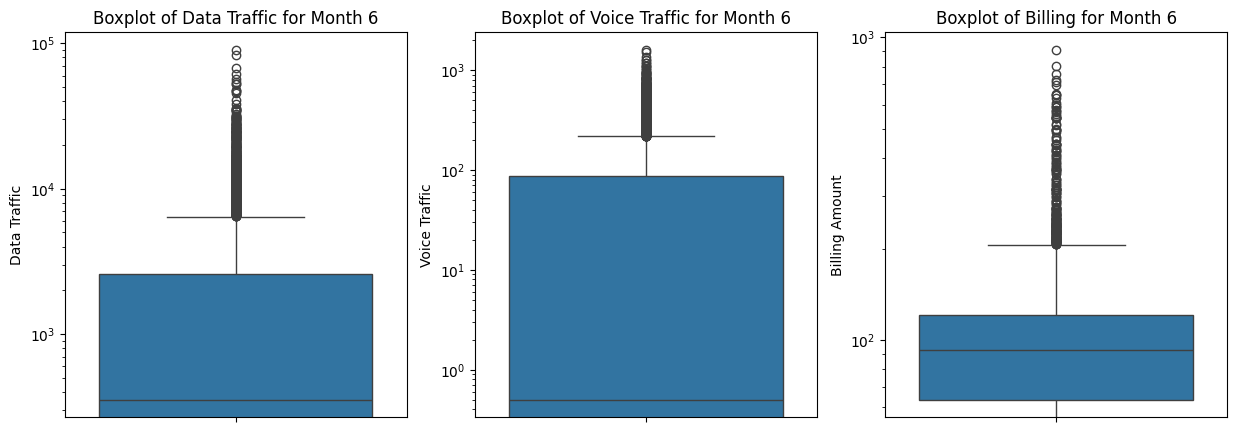

In [ ]:
# Set the size of the plots
plt.figure(figsize=(15, 5))

# Create a boxplot for DATA_TRAFFIC_MONTH_6
plt.subplot(1, 3, 1)
sns.boxplot(y=cleaned_dataset_3['DATA_TRAFFIC_MONTH_6'])
plt.title('Boxplot of Data Traffic for Month 6')
plt.ylabel('Data Traffic')
plt.yscale('log')

# Create a boxplot for VOICE_TRAFFIC_MONTH_6
plt.subplot(1, 3, 2)
sns.boxplot(y=cleaned_dataset_3['VOICE_TRAFFIC_MONTH_6'])
plt.title('Boxplot of Voice Traffic for Month 6')
plt.ylabel('Voice Traffic')
plt.yscale('log')

# Create a boxplot for BILLING_MONTH_6
plt.subplot(1, 3, 3)
sns.boxplot(y=cleaned_dataset_3['BILLING_MONTH_6'])
plt.title('Boxplot of Billing for Month 6')
plt.ylabel('Billing Amount')
plt.yscale('log')
plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

- **Data Traffic Boxplot:** There are so many outliers out of the plotbox. Most of the data points out of the plotbox are in [10,000 - 100,000]. So I would use outlier threshould over 10,000.

- **Voice Traffic Boxplot:** There are so many outliers out of the plotbox. Most of the data points out of the plotbox are in [100 - 1000]. So I would use outlier threshould over 100.

- **Billing Amount Boxplot:** There are so many outliers out of the plotbox. Most of the data points out of the plotbox are in [100 - 1000]. So I would use outlier threshould over 100.

In this dataset, there are many dependencies between different attributes, e.g., a large voice traffic will probably be associated with a large data traffic, a more expensive bill, and possibly a more expensive device (`DEVICE_VALUE`).

You can use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

To compute Pearson correlations, you use:

```python
df.corr(method='pearson', numeric_only=True)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

                       VOICE_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_2  \
VOICE_TRAFFIC_MONTH_1                   1.00                   0.82   
VOICE_TRAFFIC_MONTH_2                   0.82                   1.00   
VOICE_TRAFFIC_MONTH_3                   0.80                   0.98   
VOICE_TRAFFIC_MONTH_4                   0.74                   0.83   
VOICE_TRAFFIC_MONTH_5                   0.73                   0.81   
VOICE_TRAFFIC_MONTH_6                   0.44                   0.51   
DATA_TRAFFIC_MONTH_1                    0.09                   0.07   
DATA_TRAFFIC_MONTH_2                    0.08                   0.08   
DATA_TRAFFIC_MONTH_3                    0.08                   0.08   
DATA_TRAFFIC_MONTH_4                    0.09                   0.09   
DATA_TRAFFIC_MONTH_5                    0.09                   0.09   
DATA_TRAFFIC_MONTH_6                    0.08                   0.08   
DURATION_LINE                           0.02                   0.03   
BILLIN

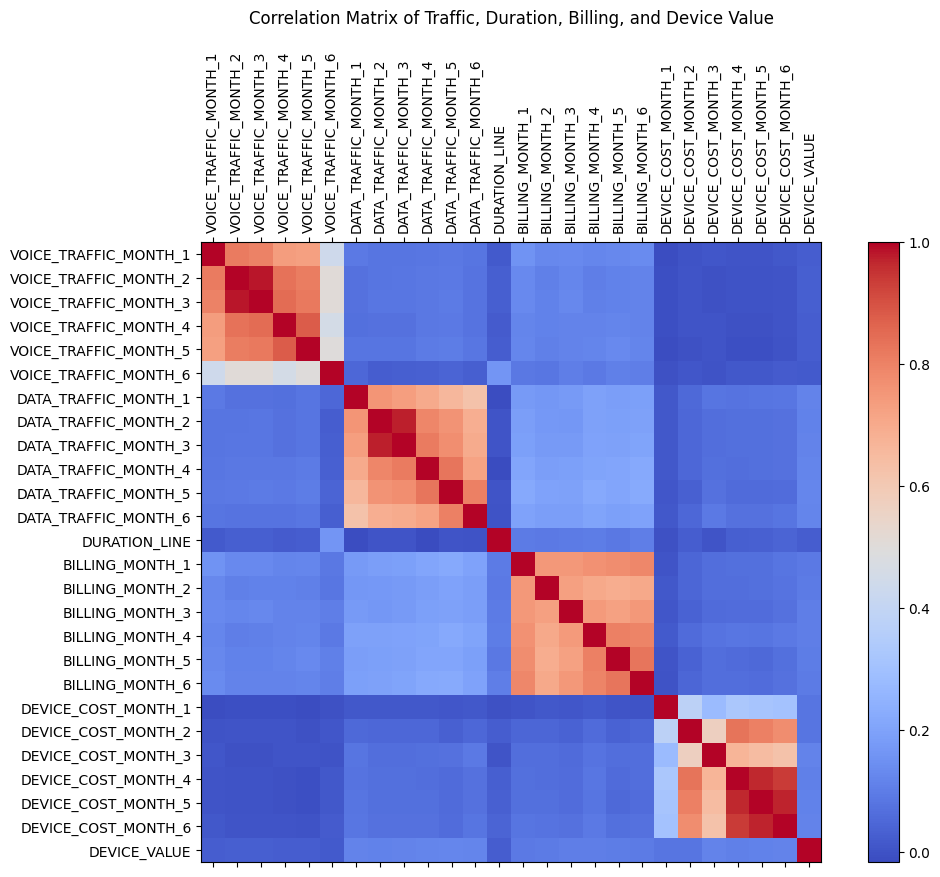

In [ ]:
# Select relevant columns for correlation
relevant_columns = [
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
    'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
    'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6',
    'DEVICE_VALUE'
]

# Calculate the correlation matrix
correlation_matrix = cleaned_dataset_3[relevant_columns].corr(method='pearson', numeric_only=True)

# Display the correlation matrix as a table
print(correlation_matrix)

# Visualize the correlation matrix using matshow
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Traffic, Duration, Billing, and Device Value', pad=20)
plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

We can see billing is more correlated with the data traffic than the voice traffic. Because when the color is more blue, the correlation is over 0.0 and when the colour is close to red the correlation is around 1.0. The voice traffic's blue is darker than data traffic's blue, so billing is more correlated with the data traffic.

## 2.3. Date management and period calculation

First, we will determine the date of the `LAST_DEVICE_CHANGE` of the last device that was changed in the entire dataset (i.e., the maximum value of the `LAST_DEVICE_CHANGE` column, plus 30 days). We will refer to that date as `latest_change`.

Note that `LAST_DEVICE_CHANGE` is expressed as a floating point number in the format `YYYYMMDD.0`, for instance 3 of July of 2018 would be `20180703.0`. Convert to integer first, then to string.

As a string, this is formatted according to [strptime](https://www.geeksforgeeks.org/python-datetime-strptime-function/) conventions with format `%Y%m%d`.

Use [datetime.datetime.strptime](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime) to convert to create object `latest_change` and print it.

Next, add 30 days to that date to obtain object `now` (we will assume we are doing this processing 30 days after the latest device change). Use a `datetime.timedelta` object for that.

Your output should look like this:

```
2019-05-01 00:00:00
2019-05-31 00:00:00
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [ ]:
from datetime import datetime, timedelta

# Convert LAST_DEVICE_CHANGE to integer and find the maximum value
latest_device_change_value = int(cleaned_dataset_3['LAST_DEVICE_CHANGE'].max())

# Convert to string and then to a datetime object
latest_change_str = str(latest_device_change_value)
latest_change = datetime.strptime(latest_change_str, '%Y%m%d')

# Print the latest change date
print(latest_change)

# Add 30 days to the latest_change date
now = latest_change + timedelta(days=30)

# Print the new date after adding 30 days
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


Now, obtain the series corresponding to the last device change, you can do it by using [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) as if you were using `strptime`:

```
series_converted = pd.to_datetime(dataframe[column_name], format='%Y%m%d')
```

Now compute the difference between the now and the series_converted.

Divide that difference by `30 * datetime.timedelta(days=1)` to obtain the difference in periods of 30 days (approximately one month).

Replace the `MONTHS_LAST_DEVICE` column with those differences. You may need to [fill the NaN with zeroes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), and [convert to type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) `int`.


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [ ]:

# Convert LAST_DEVICE_CHANGE to datetime
series_converted = pd.to_datetime(cleaned_dataset_3['LAST_DEVICE_CHANGE'], format='%Y%m%d')

# Calculate the difference between 'now' and 'series_converted'
difference = now - series_converted

# Divide the difference by 30 days to get the number of months
months_last_device = difference / timedelta(days=30)

# Replace NaN values with 0 and convert to int
input_dataset['MONTHS_LAST_DEVICE'] = months_last_device.fillna(0).astype(int)

print(input_dataset[['LAST_DEVICE_CHANGE', 'MONTHS_LAST_DEVICE']].head())


   LAST_DEVICE_CHANGE  MONTHS_LAST_DEVICE
0                 NaN                0.00
1         20170401.00               26.00
2                 NaN                0.00
3         20171001.00               20.00
4         20190101.00                5.00


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable. Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [ ]:
# Convert LINE_ACTIVATION_DATE to datetime
line_activation_date = pd.to_datetime(cleaned_dataset_3['LINE_ACTIVATION_DATE'], format='%Y%m%d')

# Calculate the difference in days between 'now' and 'line_activation_date'
cleaned_dataset_3['DURATION_LINE'] = (now - line_activation_date).dt.days

# Calculate the average DURATION_LINE
average_duration_days = cleaned_dataset_3['DURATION_LINE'].mean()

# Convert average duration from days to years
average_duration_years = average_duration_days / 365

# Print the average duration in years
print(f"Average DURATION_LINE: {average_duration_days} days, which is approximately {average_duration_years:.2f} years.")


Average DURATION_LINE: 2018.5996376811595 days, which is approximately 5.53 years.



## 2.4. Standarization and scaling of numerical variables

Scaling a series involves changing the values. Standardization involves ensuring that the mean is 0 and the standard deviation is 1, while min-max scaling requires that the maximum is 1, the minimum is 0, and all remaining values are linearly interpolated.

You can use [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standarize a variable, and [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to perform min-max scaling.

The following example shows how to use these:

```python
test_data = [{'x': -1.0}, {'x': 2.0}, {'x': 3.0}, {'x': 6.0}]
test_df = pd.DataFrame(test_data)
display(test_df)

test_df['x_standardized'] = StandardScaler().fit_transform(test_df[['x']])
test_df['x_minmaxscaled'] = MinMaxScaler().fit_transform(test_df[['x']])
display(test_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



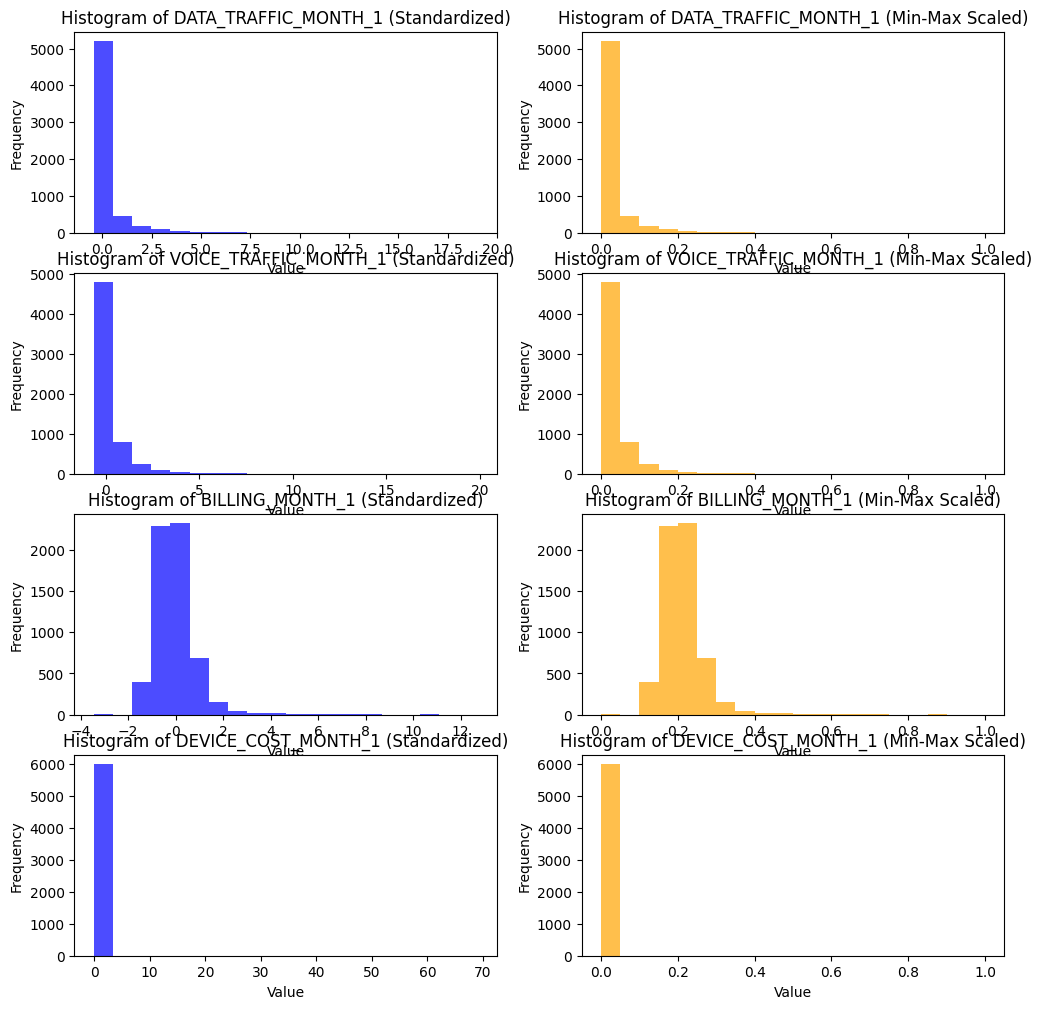

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize and Min-Max scale specified columns
columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

for column in columns_to_scale:
    # Standardization
    cleaned_dataset_3[column + '_STANDARD'] = StandardScaler().fit_transform(cleaned_dataset_3[[column]])

    # Min-Max Scaling
    cleaned_dataset_3[column + '_MINMAX'] = MinMaxScaler().fit_transform(cleaned_dataset_3[[column]])

# Plot histograms for each new variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

for i, column in enumerate(columns_to_scale):
    # Histogram for standardized
    axes[i, 0].hist(cleaned_dataset_3[column + '_STANDARD'], bins=20, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Histogram of {column} (Standardized)')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Histogram for Min-Max scaled
    axes[i, 1].hist(cleaned_dataset_3[column + '_MINMAX'], bins=20, color='orange', alpha=0.7)
    axes[i, 1].set_title(f'Histogram of {column} (Min-Max Scaled)')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Frequency')


plt.show()


## 2.5. Convert categorical columns to dummy binary variables

Categorical variables usually need to be transformed into numerical values to apply some machine learning methods.

Use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform a categorical variable to integer values. Example:

```python
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

colors_df['colors_int_encoded'] = LabelEncoder().fit_transform(colors_df['color'])
display(colors_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Transform the PREVIOUS_DEVICE_BRAND categorical variable to integer values
cleaned_dataset_3['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(cleaned_dataset_3['PREVIOUS_DEVICE_BRAND'])

# Display the updated DataFrame
print(cleaned_dataset_3[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']].head())

  PREVIOUS_DEVICE_BRAND  PREVIOUS_DEVICE_BRAND_INT_ENCODED
0              Motorola                                  2
1               Samsung                                  4
2              Motorola                                  2
3                 Apple                                  0
4                Outros                                  3


You can use [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to convert a categorical variable to multiple columns using one-hot encoding. Example:

```
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

color_dummies = pd.get_dummies(colors_df['color'], prefix='color_')
colors_df_with_dummies = colors_df.join(color_dummies)
display(colors_df_with_dummies)
```


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

In [ ]:
# Create dummy binary variables for the PREVIOUS_DEVICE_MANUF column
previous_device_manuf_dummies = pd.get_dummies(cleaned_dataset_3['PREVIOUS_DEVICE_MANUF'], prefix='manuf_')

# Join the dummy variables with the original DataFrame
input_dataset_with_dummies = cleaned_dataset_3.join(previous_device_manuf_dummies)

# Display the updated DataFrame with the new dummy variables
print(input_dataset_with_dummies.head())


                                    PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        393.00   
1  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
2     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        875.00   
3  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        345.00   
4     TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO        609.00   

   LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  DATA_TRAFFIC_MONTH_2  \
0                 NaN                465.25                530.81   
1         20170401.00                232.24                272.26   
2                 NaN                484.62                264.14   
3         20171001.00               4255.46                836.12   
4         20190101.00               5014.10               2659.05   

   DATA_TRAFFIC_MONTH_3  DATA_TRAFFIC_MONTH_4  DATA_TRAFFIC_MONTH_5  \
0                530.81                781.13                398.99   
1                272.2

## 2.6. Feature generation

In the current dataset we have a historic of 6 months for data traffic, voice traffic, billing and device cost. Feature generation consists of creating new attributes from the current dataset that can help us to create, e.g., better predictive models.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [ ]:
# We define the columnes to use to compute the new columns
groups = ['DATA_TRAFFIC', 'VOICE_TRAFFIC', 'BILLING', 'DEVICE_COST']

for group in groups:
    new_columns = [f'{group}_MONTH_{i}' for i in range(1, 7)]

    # Compute the stadistics and store the new columns with the results
    cleaned_dataset_3[f'{group}_MEAN'] = cleaned_dataset_3[new_columns].mean(axis=1)
    cleaned_dataset_3[f'{group}_MAX'] = cleaned_dataset_3[new_columns].max(axis=1)
    cleaned_dataset_3[f'{group}_MIN'] = cleaned_dataset_3[new_columns].min(axis=1)
    cleaned_dataset_3[f'{group}_RANGE'] = cleaned_dataset_3[f'{group}_MAX'] - cleaned_dataset_3[f'{group}_MIN']


<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

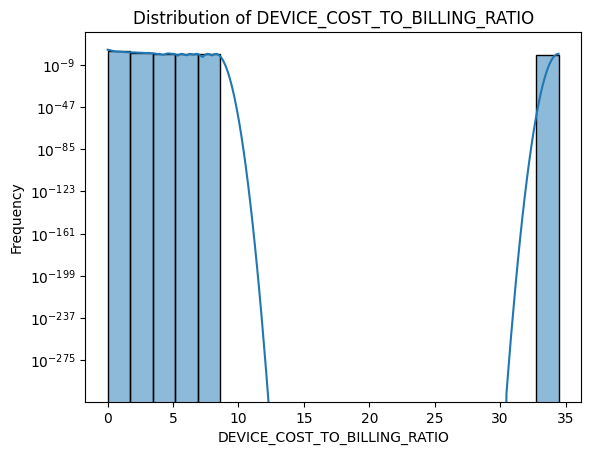

In [ ]:
# Create DEVICE_COST_TO_BILLING_RATIO column
cleaned_dataset_3['DEVICE_COST_TO_BILLING_RATIO'] = cleaned_dataset_3['DEVICE_COST_MEAN'] / cleaned_dataset_3['BILLING_MEAN']

# Plot the distribution of DEVICE_COST_TO_BILLING_RATIO
sns.histplot(data=cleaned_dataset_3, x='DEVICE_COST_TO_BILLING_RATIO', bins=20, kde=True)
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO')
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

The distribution of the DEVICE_COST_TO_BILLING_RATIO appears to be nonsymetric with high frequency to the left and a bit to the right, a significant concentration of values close to [0-8]. This type of distribution looks like an exponential distribution or a log distribution because The majority of data points are in low ratio (0-5), close to lower values. And the fall in the histogram is abrupt. There is an exception in the number 34, because there is case where device cost is higher than billing.

## 2.7. Text parsing/processing

In machine learning, text processing is a very useful tool that can be used to improve datasets. In some use cases, for instance customer care applications using digital channels as Whatsapp, Facebook, etc..., data scientist teams mainly work with text data.

One of the text processing technique is to extract concrete words or tokens from a sentence or documents. Regular expressions are a great tool to extract data trough these patterns.

In this dataset, note that **PURCHASED_DEVICE** is a variable that is formed by a "**device_code**"+"**_**"+"**manufacture name**"+"**  **"+"**device model**". We want to split this variable into its components.

Tip: use [str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to separate a string into several parts.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [ ]:

# Splitting the PURCHASED_DEVICE variable into 3 parts
split_columns = cleaned_dataset_3['PURCHASED_DEVICE'].str.split('_', expand=True)

# Assigning each part to a new column
cleaned_dataset_3['PURCHASED_DEVICE_CODE'] = split_columns[0]
cleaned_dataset_3['PURCHASED_DEVICE_MANUFACTURER_MODEL'] = split_columns[1]

# Further split the manufacturer and model
manufacturer_model_split = cleaned_dataset_3['PURCHASED_DEVICE_MANUFACTURER_MODEL'].str.split(' ', n=1, expand=True)
cleaned_dataset_3['PURCHASED_DEVICE_MANUFACTURER'] = manufacturer_model_split[0]
cleaned_dataset_3['PURCHASED_DEVICE_MODEL'] = manufacturer_model_split[1]

# Drop the intermediate column if no longer needed
cleaned_dataset_3.drop(columns=['PURCHASED_DEVICE_MANUFACTURER_MODEL'], inplace=True)

# Display the final DataFrame
cleaned_dataset_3[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']].head()

,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO


<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [ ]:
# Table 1: Number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER
devices_per_manufacturer_purchased = cleaned_dataset_3['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
devices_per_manufacturer_purchased.columns = ['Manufacturer', 'Number of Devices']

# Table 2: Number of devices per manufacturer in PREVIOUS_DEVICE_MANUF
devices_per_manufacturer_previous = cleaned_dataset_3['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
devices_per_manufacturer_previous.columns = ['Manufacturer', 'Number of Devices']

In [ ]:
# Print the table
print("Number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER:")
print(devices_per_manufacturer_purchased)

Number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER:
  Manufacturer  Number of Devices
0           LG               3556
1      SAMSUNG               1094
2     MOTOROLA                630
3        APPLE                448
4      ALCATEL                258
5         ASUS                  2


In [ ]:
# Print the table
print("\nNumber of devices per manufacturer in PREVIOUS_DEVICE_MANUF:")
print(devices_per_manufacturer_previous)


Number of devices per manufacturer in PREVIOUS_DEVICE_MANUF:
                                     Manufacturer  Number of Devices
0                                   Samsung Korea               1879
1                                       Apple Inc               1495
2         Motorola Mobility LLC, a Lenovo Company                849
3                             LG Electronics Inc.                506
4                           TCL Communication Ltd                279
..                                            ...                ...
62          Lanxun Technology (Hong Kong) Limited                  1
63  Beijing Flyscale Technologies Company Limited                  1
64                        Meizu Technology Co Ltd                  1
65                    TP-Link Technologies Co Ltd                  1
66                            Vogtec (H.K) Co Ltd                  1

[67 rows x 2 columns]


## 2.8. Splitting and sampling a dataset

Splitting and sampling dataset are techniques that distribute the original dataset in n-parts. One of the most interesting application of these tools is to separate the dataset to train and test a machine learning model. Meanwhile sampling guarantees same type of data (i.e. distributions), splitting will separate the dataset with the ratio we need. Usually, 80%-20% or 70%-30% splitting ratios are the most common used.

Once again, Sklearn library helps to us to cover this necessity through the function [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which splits a dataset into two parts, which usually will be used for training and testing.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [ ]:
train_df, test_df = train_test_split(cleaned_dataset_3, test_size=0.30, random_state=42)

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

In [ ]:
# Compute the statistics for the variables in the training dataset
train_stats = train_df[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()

# Compute the statistics for the variables in the testing dataset
test_stats = test_df[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()

# Display the statistics
print("Training dataset statistics:")
print(train_stats)

print("\nTesting dataset statistics:")
print(test_stats)

Training dataset statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               4191.00                4191.00          4191.00
mean                2549.41                 132.02           100.03
std                 5612.93                 203.67            65.03
min                    0.00                   0.00          -124.49
25%                    0.00                  10.20            63.36
50%                  399.50                  64.20            92.99
75%                 2842.26                 171.55           121.14
max               112421.17                4113.00           911.72

Testing dataset statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               1797.00                1797.00          1797.00
mean                2567.66                 127.12            98.42
std                 6135.75                 191.84            64.83
min                    0.00                   0.00        

The statistics for both the training and testing datasets reveal some patterns:

**1. DATA_TRAFFIC_MONTH_1:**
- **Training Dataset:** It has a mean of 2549.41 MB and a standard deviation of 5612.93 MB. A significant number of users have zero data usage (for instance: 25th percentile). The maximum value of 112.421 MB is so higher compared to mean.
- **Testing Dataset:** The mean is similar, but the standard deviation is higher at 6135,75 MB. The maximum value of 97074.62 MB is lower than in the training set.

**2. VOICE_TRAFFIC_MONTH_1:**
- **Training Dataset:** The mean voice traffic is 132.02 minutes, with a high standard deviation of 203.67 minutes. Similar to data traffic, 25% of the users have very low voice traffic (0 minutes at the 25th percentile). The maximum value is high at 4113 minutes.
- **Testing Dataset:** The mean (127.12 minutes) and standard deviation (191.84 minutes) are lower than in the training dataset.
The maximum value is 2377.90 minutes, which is less compared to the training dat.

**3. BILLING_MONTH_1:**
- **Training Dataset:** The average bill is around 100.03. There are some mistakes that not mach. For instance, the minimum value (-124.49) is negative.  The upper quartile (75th percentile) is 121.14, and the maximum bill is 911.72.
- **Testing Dataset:** The mean bill is slightly lower at 98.42, and the standard deviation is comparable to the training set.
There is a negative minimum value (-21.03), which again suggests errors.
The maximum bill is 926.41, which is consistent with the training dataset.

# 3. Comparing iPhone and Samsung J series users

Finally, find some features that are different between users of an Apple iPhone and users of a Samsung J series phone (this includes J410G, J610G, J415G, and all other models by Samsung that start with a *J*).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [ ]:
# Create dataframe for Apple iPhone users
iphone_users_df=cleaned_dataset_3.copy()
iphone_users_df = iphone_users_df[iphone_users_df['PURCHASED_DEVICE_MANUFACTURER'].str.contains('Apple', case=False, na=False)]

# Create dataframe for Samsung J series users
samsung_j_series_users_df=cleaned_dataset_3.copy()
samsung_j_series_users_df = samsung_j_series_users_df[samsung_j_series_users_df['PURCHASED_DEVICE_MANUFACTURER'].str.contains('Samsung', case=False, na=False)]

# Print the number of users in each group
print(f"Number of Apple iPhone users: {iphone_users_df.shape[0]}")
print(f"Number of Samsung J series users: {samsung_j_series_users_df.shape[0]}")


Number of Apple iPhone users: 448
Number of Samsung J series users: 1094


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

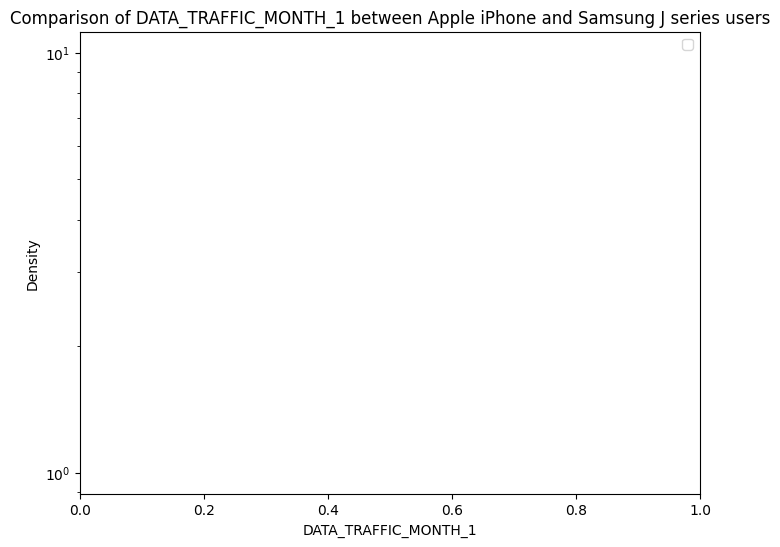

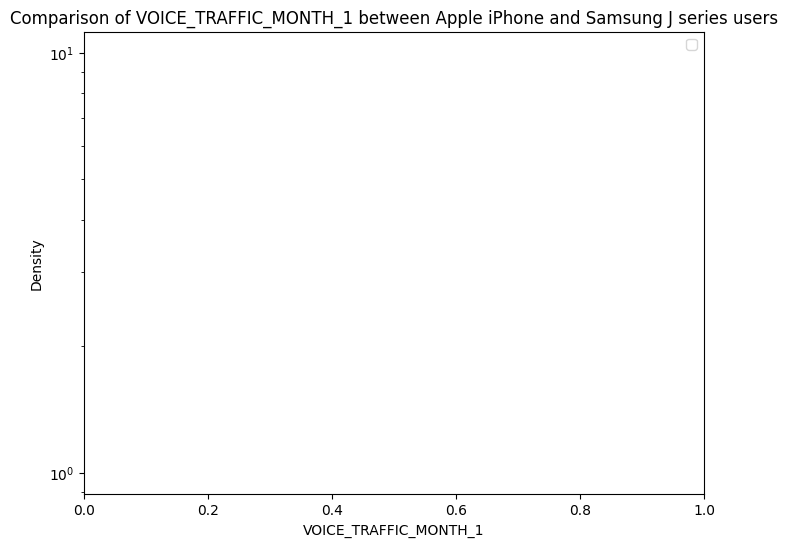

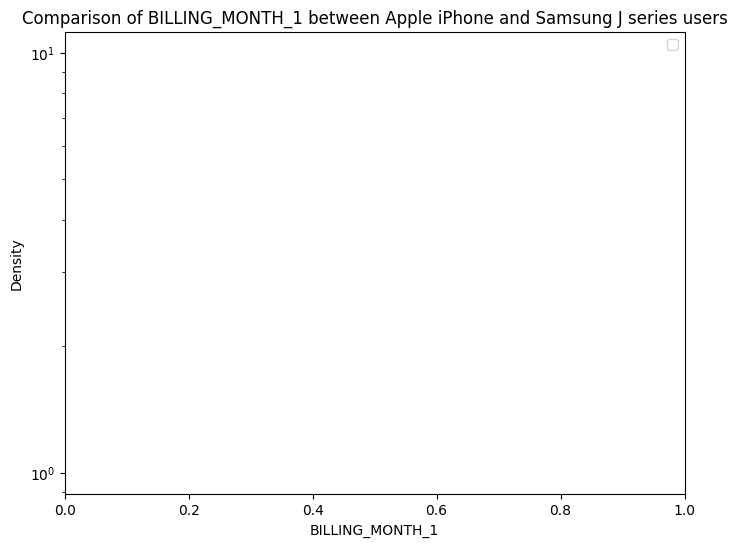

In [ ]:
variables = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']

# Plot histograms for the variables
for var in variables:
    plt.figure(figsize=(8, 6))

    sns.histplot(iphone_users_df[var], color='blue', label='Apple iPhone', kde=False, bins=20)

    # Histogram for Samsung J series users
    sns.histplot(samsung_j_series_users_df[var], color='green', label='Samsung J series', kde=False, bins=20)

    # Add labels and title
    plt.title(f'Comparison of {var} between Apple iPhone and Samsung J series users')
    plt.xlabel(var)
    plt.ylabel('Density')

    # Add legend
    plt.legend()
    plt.yscale('log')

    # Show the plot
    plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

- **BILLING_MONTH_1:** The Samsung J series users tend to have higher densities at the lower billing amounts (0-200 range) compared to iPhone users. However, both distributions are right-skewed, with most users having low billing amounts.


- **VOICE_TRAFFIC_MONTH_1:** Both Apple and Samsung users has a similar pattern, with most of users falling within the lower ranges (0-400 range). Samsung users have a higher density for moderate usage, whereas Apple users have a small group with higher voice traffic values (e.g., 1000-1600).


- **DATA_TRAFFIC_MONTH_1:** The Samsung J series users tend to have high densities at the data traffic amounts (0-20000 range), the same case with iPhone users. But iPhone users has a higher density at the data traffic amount than Samsung J series users. There is 1 iPhone user close to 100,000 data traffic and is the biggest one, meanwhile the tail is more composed of Samsung J users and fewer iPhone users.

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/data-mining-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, remember what you learned in machine learning and create a simple [decision tree model](https://scikit-learn.org/stable/modules/tree.html) having as input variables:

1. PREVIOUS\_DEVICE\_MODEL
1. PREVIOUS\_DEVICE\_BRAND
1. MONTHS\_LAST\_DEVICE

And as output variable `PURCHASED_DEVICE_MANUFACTURER`. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.


**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: model purchased device</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
input_variables = ['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND', 'MONTHS_LAST_DEVICE']
output_variable = 'PURCHASED_DEVICE_MANUFACTURER'

# One-hot encode the dataset
all_variables_1=input_variables + [output_variable]
df_encoded_dummies_1 = pd.get_dummies(cleaned_dataset_3[all_variables_1], drop_first=False)

# Split the dataset into features and target variable
y_columns=[col for col in df_encoded_dummies_1.columns if col.startswith(output_variable)]
X = df_encoded_dummies_1.drop(y_columns, axis=1)
y = df_encoded_dummies_1[y_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
tree_model_3 = DecisionTreeClassifier(random_state=42)
tree_model_3.fit(X_train, y_train)

# Predict on the test set
y_pred_3 = tree_model_3.predict(X_test)

# Measure accuracy
accuracy_3_variables = accuracy_score(y_test, y_pred_3)
print(f'Accuracy with 3 variables: {accuracy_3_variables:.2f}')


Accuracy with 3 variables: 0.48


In [ ]:
# Add two more variables
new_input_variables = input_variables + ['LAST_DEVICE_CHANGE', 'DURATION_LINE']

# One-hot encode the dataset
all_variables_2=new_input_variables+[output_variable]
df_encoded_dummies_2 = pd.get_dummies(cleaned_dataset_3[all_variables_2], drop_first=False)

# Split the dataset into features and target variable
X = df_encoded_dummies_2.drop(y_columns, axis=1)
y = df_encoded_dummies_2[y_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
tree_model_3 = DecisionTreeClassifier(random_state=42)
tree_model_3.fit(X_train, y_train)

# Predict on the test set
y_pred_3 = tree_model_3.predict(X_test)

# Measure accuracy
accuracy_3_variables = accuracy_score(y_test, y_pred_3)
print(f'Accuracy with 3 variables: {accuracy_3_variables:.2f}')

Accuracy with 3 variables: 0.55


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>